### Installing required libraries

In [30]:
##!pip install xgboost catboost lightgbm

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
    --------------------------------------- 0.8/56.8 MB 2.2 MB/s eta 0:00:26
    --------------------------------------- 1.3/56.8 MB 2.2 MB/s eta 0:00:25
   - -------------------------------------- 1.8/56.8 MB 2.6 MB/s eta 0:00:22
   -- ------------------------------------- 2.9/56.8 MB 2.9 MB/s eta 0:00:19
   -- ------------------------------------- 3.9/56.8 MB 3.4 MB/s eta 0:00:16
   --- ------------------------------------ 5.0/56.8 MB 3.6 MB/s eta 0:00:15
   ---- ----------------------------------- 6.0/56.8 MB 3.8 MB/s eta 0:00:14
   ---- ----------------------------------- 7.1/56.8 MB 4.0 MB/s eta 0:00:13
   ----- ---------------------------------- 8.1/56.8 MB 4.1 MB/s eta 0:00:12
   ------ --------------------------------- 9.2/56.8 MB 4.2 MB/s eta 0:00:12
   ------- -------------------------------- 10.2/56.8 MB 4.3 MB/s eta 0:00:11
   -------- 

### Import libraries

In [66]:
import numpy as np       # NumPy: for numerical operations and array handling
import pandas as pd      # Pandas: for data manipulation and analysis
import matplotlib.pyplot as plt  # Matplotlib: for plotting
import seaborn as sns    # Seaborn: for advanced plotting (heatmaps, countplots, etc.)
from sklearn.model_selection import train_test_split  # To split dataset into training and test sets
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler  # Scaling features
from sklearn.metrics import accuracy_score, confusion_matrix  # Model evaluation metrics
from xgboost import XGBClassifier  # XGBoost model
from catboost import CatBoostClassifier  # CatBoost model
from lightgbm import LGBMClassifier  # LightGBM model

In [2]:
# Load the dataset from the given file path into a Pandas DataFrame
df = pd.read_csv('C:\\Users\\Ant PC\\Downloads\\Test_data.csv')

In [3]:
# Display the first 5 rows of the dataset to quickly inspect the data structure
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [4]:
# Display a concise string summary of the DataFrame, including index, column names, and data types
str(df)

"       employee_id         department     region         education gender  \\\n0             8724         Technology  region_26        Bachelor's      m   \n1            74430                 HR   region_4        Bachelor's      f   \n2            72255  Sales & Marketing  region_13        Bachelor's      m   \n3            38562        Procurement   region_2        Bachelor's      f   \n4            64486            Finance  region_29        Bachelor's      m   \n...            ...                ...        ...               ...    ...   \n23485        53478              Legal   region_2   Below Secondary      m   \n23486        25600         Technology  region_25        Bachelor's      m   \n23487        45409                 HR  region_16        Bachelor's      f   \n23488         1186        Procurement  region_31        Bachelor's      m   \n23489         5973         Technology  region_17  Master's & above      m   \n\n      recruitment_channel  no_of_trainings  age  previous_ye

In [5]:
# Check for missing values in each column and display the total count of nulls per column
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

### Handling Missing Values

In [6]:
# Mode imputation for education
education_mode = df['education'].mode()[0]
df['education'] = df['education'].fillna(education_mode)

In [7]:
# Calculate median of previous_year_rating (ignoring NaN values)
median_rating = df['previous_year_rating'].median()

print("Median of previous_year_rating:", median_rating)


Median of previous_year_rating: 3.0


In [8]:
# Impute missing values with median
df['previous_year_rating'] = df['previous_year_rating'].fillna(median_rating)

In [9]:
# Check if nulls are handled
print(df[['education',  'previous_year_rating']].isnull().sum())

education               0
previous_year_rating    0
dtype: int64


### Checking Dupicates

In [10]:
# Check total number of duplicate rows
print("Total duplicate rows:", df.duplicated().sum())

Total duplicate rows: 0


In [11]:
# Drop employee_id column

df = df.drop(columns=['employee_id'])

# Confirm it's removed
print(df.columns)

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')


In [12]:
print(df.dtypes)

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object


In [13]:
# Select categorical columns (object or category type)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical columns:", categorical_cols)

Categorical columns: ['department', 'region', 'education', 'gender', 'recruitment_channel']


### One Hot Encoding

In [14]:
# One-hot encode categorical variables
categorical_cols = ['department', 'region', 'education', 'gender', 'recruitment_channel']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Convert any boolean columns to integers
df_encoded = df_encoded.astype(int)

# Check first few rows
print(df_encoded.head())

   no_of_trainings  age  previous_year_rating  length_of_service  \
0                1   24                     3                  1   
1                1   31                     3                  5   
2                1   31                     1                  4   
3                3   31                     2                  9   
4                1   30                     4                  7   

   KPIs_met >80%  awards_won?  avg_training_score  department_Finance  \
0              1            0                  77                   0   
1              0            0                  51                   0   
2              0            0                  47                   0   
3              0            0                  65                   0   
4              0            0                  61                   1   

   department_HR  department_Legal  ...  region_region_5  region_region_6  \
0              0                 0  ...                0                0  

In [15]:
# Check new shape and columns
print("Shape after encoding:", df_encoded.shape)
print("Encoded columns:\n", df_encoded.columns[:20])  # showing first 20 columns

Shape after encoding: (23490, 53)
Encoded columns:
 Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_10', 'region_region_11', 'region_region_12',
       'region_region_13', 'region_region_14'],
      dtype='object')


### Count Plots for categorical Variables

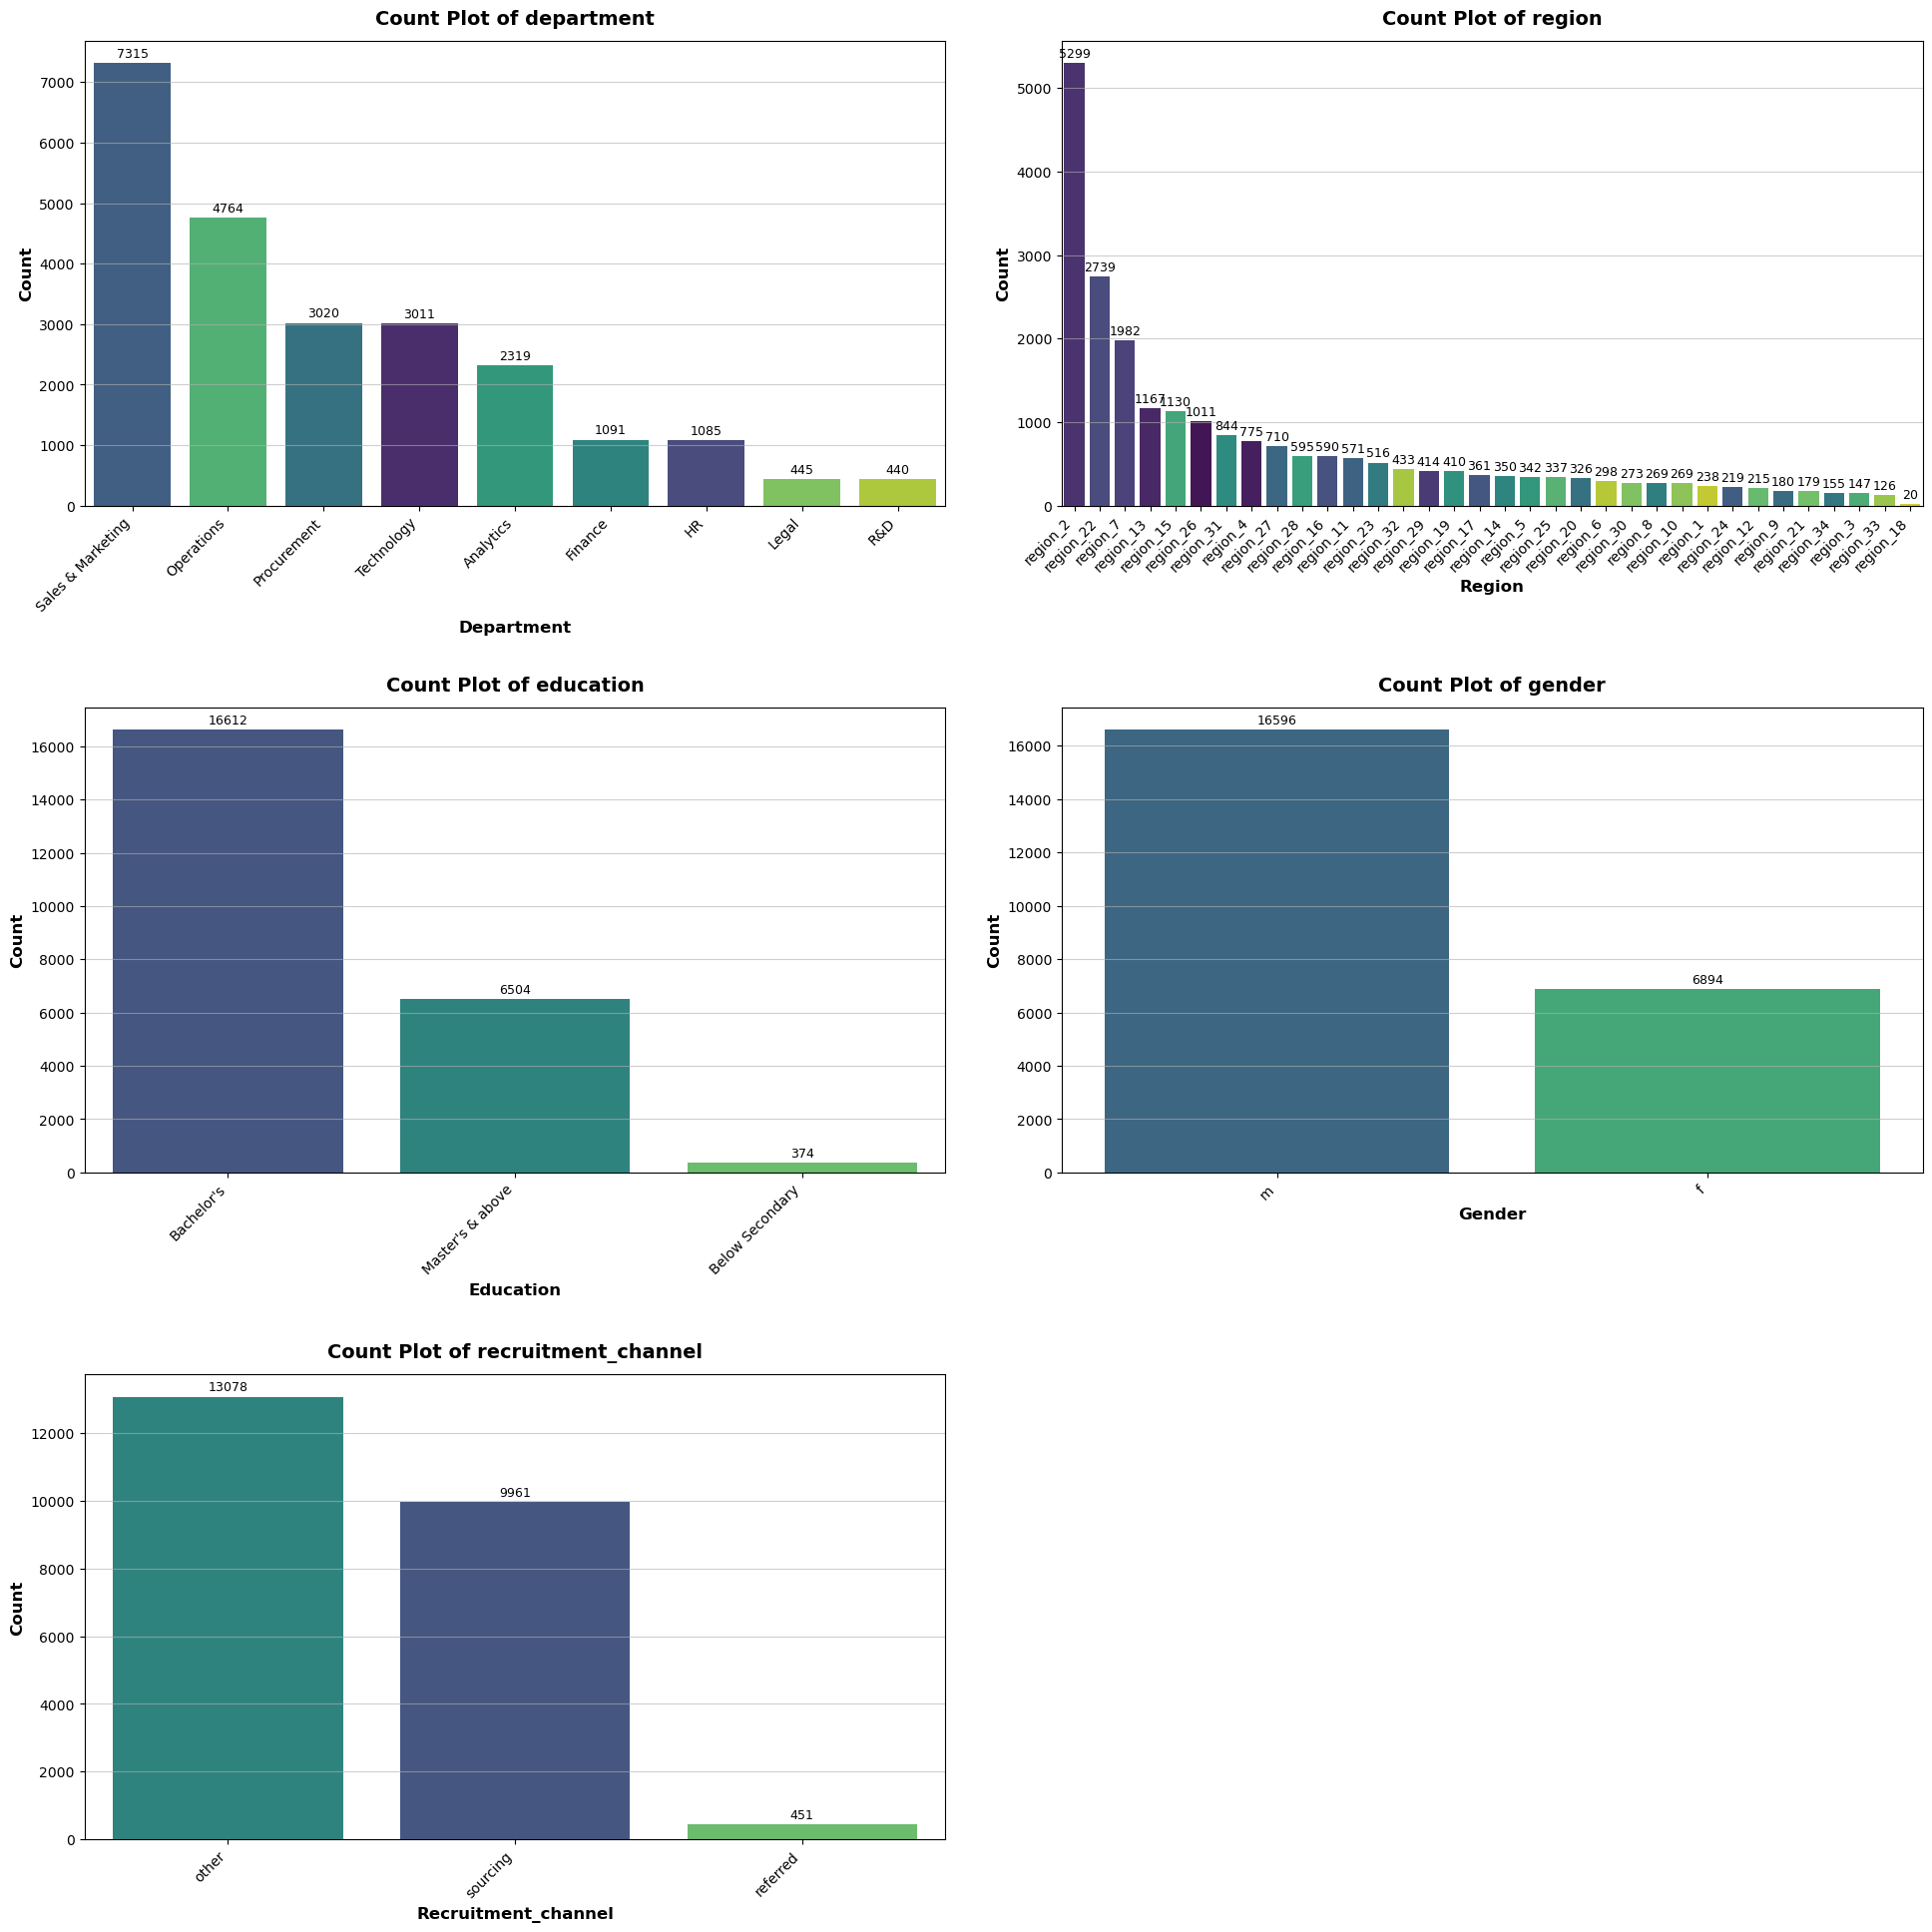

In [19]:
# -----------------------------
# 1. Categorical Variables
# -----------------------------
# Get categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Plot categorical distributions
plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    ax = sns.countplot(
        data=df,
        x=col,
        order=df[col].value_counts().index,
        hue=col,          # explicitly set hue
        palette="viridis",
        legend=False      # remove redundant legend
    )

    # Add count labels above bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=9, padding=2)

    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel(col.capitalize(), fontsize=12, fontweight="bold")
    plt.ylabel("Count", fontsize=12, fontweight="bold")
    plt.title(f"Count Plot of {col}", fontsize=14, fontweight="bold", pad=12)
    plt.grid(axis="y", linestyle="-", alpha=0.6)

plt.tight_layout(pad=3.0)
plt.show()

### Distribution for Numerical Variables

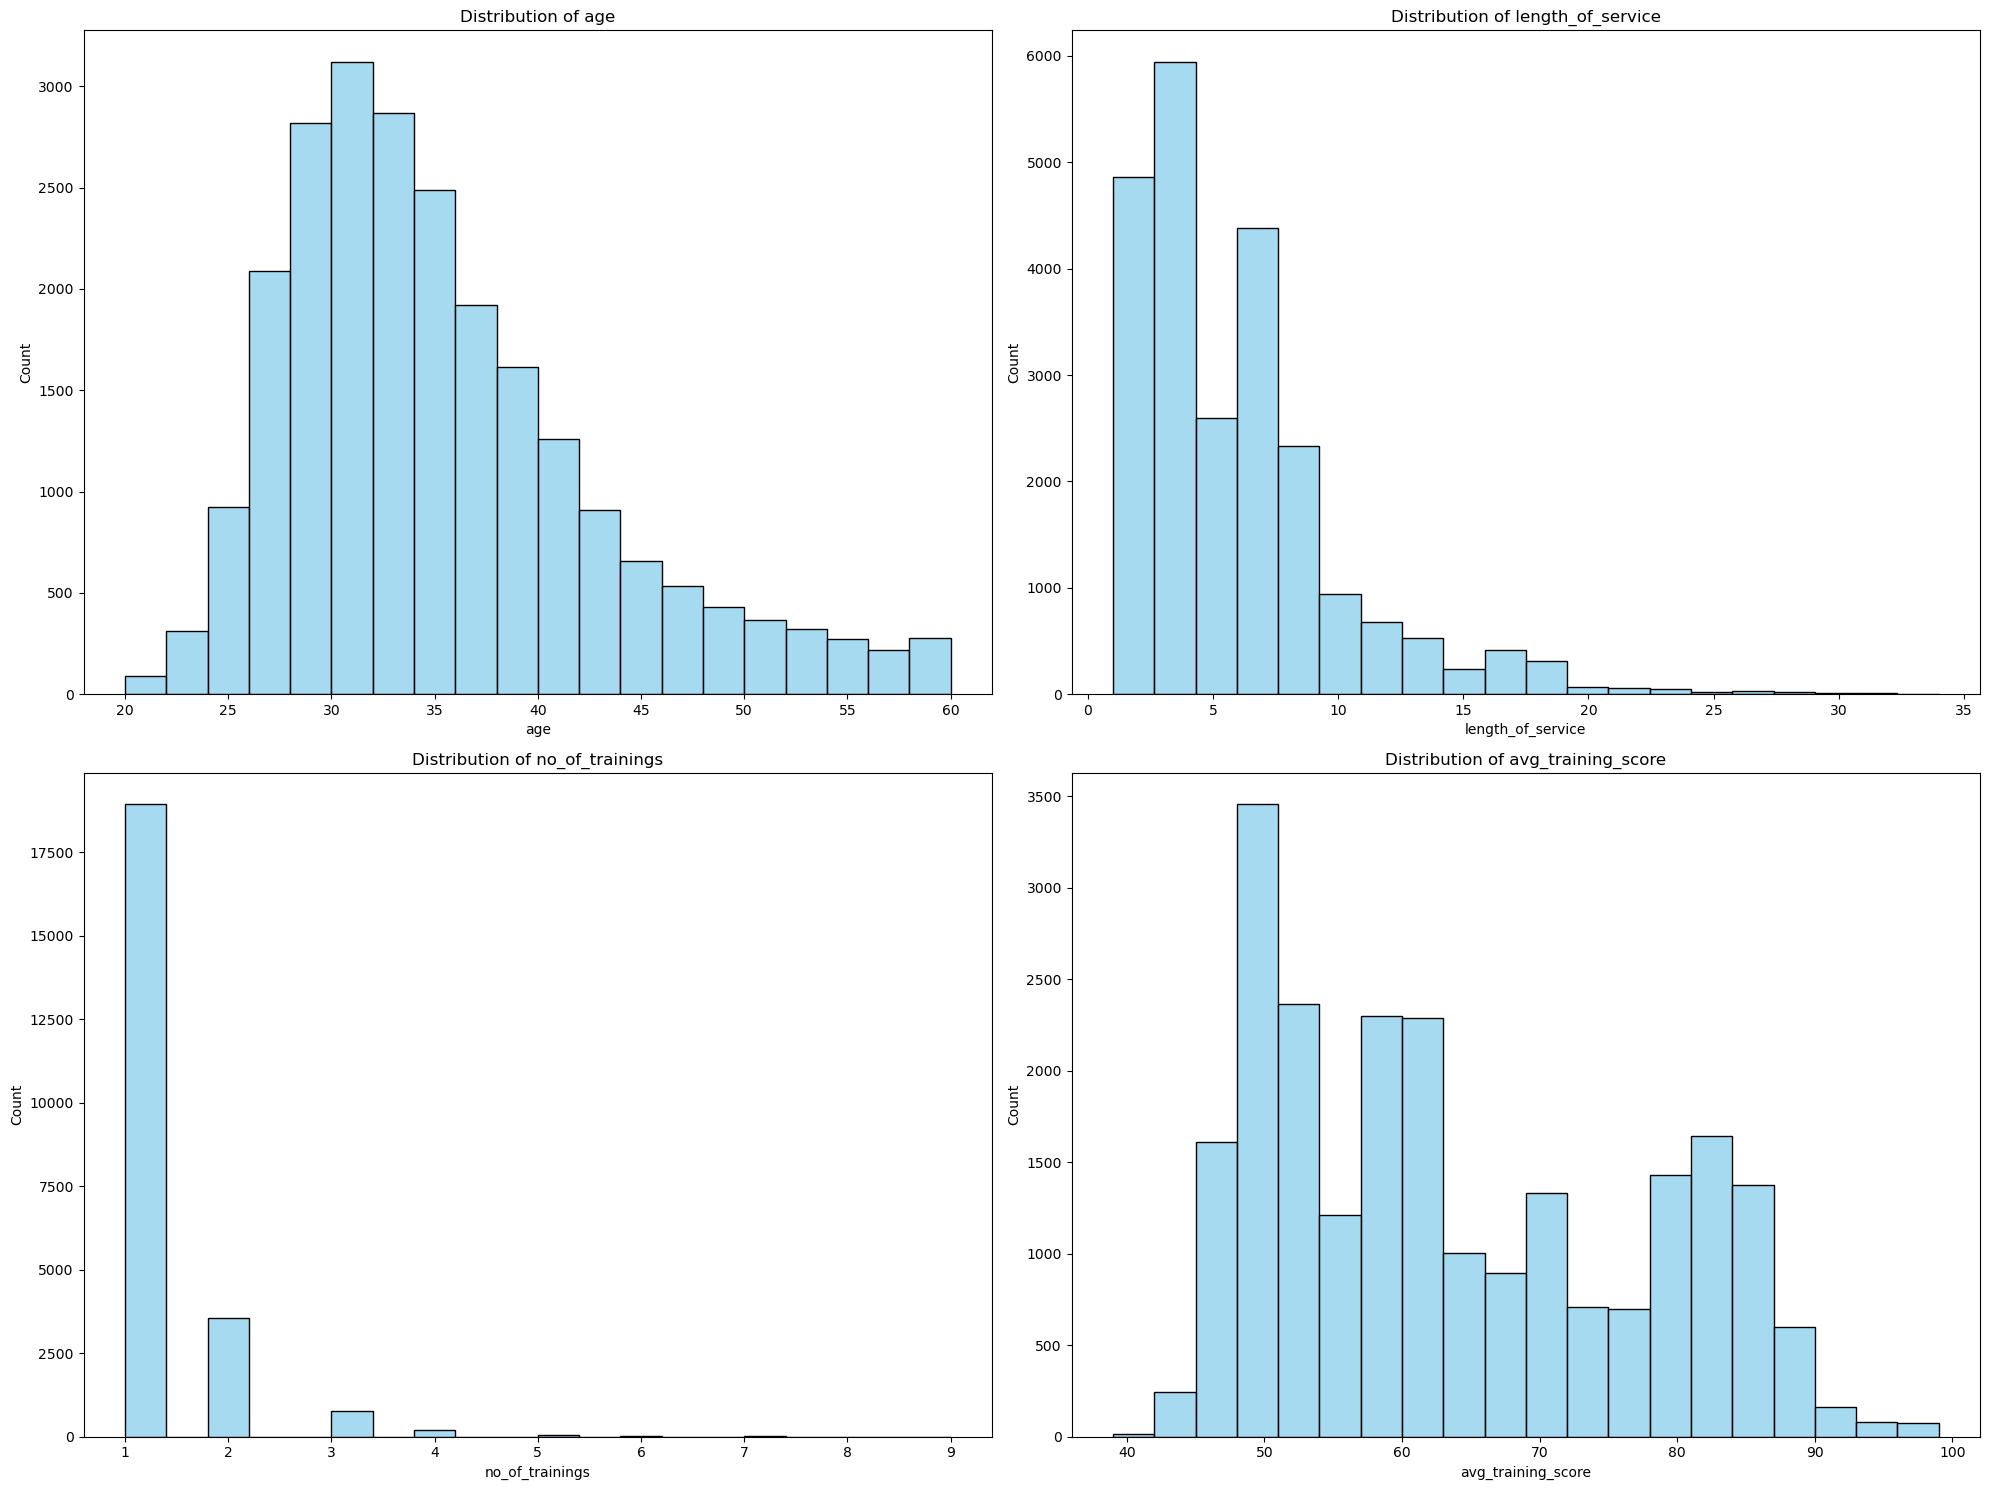

In [20]:
# -----------------------------
# 2. Numerical Variables (binned)
# -----------------------------
numerical_cols = ['age', 'length_of_service', 'no_of_trainings', 'avg_training_score']

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=20, kde=False, color="skyblue")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

#### Data Scaling

In [26]:
def run_all_scalers(data):
    """
    Apply RobustScaler, StandardScaler, MinMaxScaler, and MaxAbsScaler
    to numeric columns in the dataset and return all results.
    
    Parameters:
    data (pd.DataFrame): Input dataset
    
    Returns:
    dict: Dictionary with scaler names as keys and scaled DataFrames as values
    """
    
    # Select only numeric columns
    num_cols = data.select_dtypes(include=['int64', 'float64']).columns
    
    # Define scalers with some customizable parameters
    scalers = {
        "RobustScaler": RobustScaler(quantile_range=(25, 75)),
        "StandardScaler": StandardScaler(),
        "MinMaxScaler": MinMaxScaler(feature_range=(0, 1)),
        "MaxAbsScaler": MaxAbsScaler()
    }
    
    results = {}
    
    # Apply each scaler
    for name, scaler in scalers.items():
        scaled_data = scaler.fit_transform(data[num_cols])
        scaled_df = pd.DataFrame(scaled_data, columns=num_cols, index=data.index)
        
        # Keep categorical columns untouched
        final_df = pd.concat([scaled_df, data.drop(num_cols, axis=1)], axis=1)
        
        results[name] = final_df
    
    return results

# Example usage
scaled_datasets = run_all_scalers(df)

# Access datasets like this:
scaled_standard = scaled_datasets["StandardScaler"]
scaled_minmax   = scaled_datasets["MinMaxScaler"]
scaled_robust   = scaled_datasets["RobustScaler"]
scaled_maxabs   = scaled_datasets["MaxAbsScaler"]

# To see first few rows of scaled dataset
print(scaled_minmax.head())

   no_of_trainings    age  previous_year_rating  length_of_service  \
0             0.00  0.100                  0.50           0.000000   
1             0.00  0.275                  0.50           0.121212   
2             0.00  0.275                  0.00           0.090909   
3             0.25  0.275                  0.25           0.242424   
4             0.00  0.250                  0.75           0.181818   

   KPIs_met >80%  awards_won?  avg_training_score         department  \
0            1.0          0.0            0.633333         Technology   
1            0.0          0.0            0.200000                 HR   
2            0.0          0.0            0.133333  Sales & Marketing   
3            0.0          0.0            0.433333        Procurement   
4            0.0          0.0            0.366667            Finance   

      region   education gender recruitment_channel  
0  region_26  Bachelor's      m            sourcing  
1   region_4  Bachelor's      f       

###  Data Scaling

##### Iterate over the data scaling functions and ML Models to understand which model under which scaling technique is giving better results using the function in Task 1 and the baseline models in Task 2.

In [34]:
# -------------------------------
# 1. Create Binary Target
# -------------------------------
# High performance = 1 if rating >= 4 else 0
df["performance_target"] = df["previous_year_rating"].apply(lambda x: 1 if x >= 4 else 0)

# -------------------------------
# 2. Define Features (X) and Target (y)
# -------------------------------
X = df.drop(["performance_target"], axis=1)
y = df["performance_target"]

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# -------------------------------
# 3. Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------------
# 4. Baseline Models
# -------------------------------

# XGBoost
# XGBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42)  
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)


# CatBoost
cat = CatBoostClassifier(verbose=0, random_state=42)
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)
acc_cat = accuracy_score(y_test, y_pred_cat)

# LightGBM
lgb = LGBMClassifier(random_state=42)
lgb.fit(X_train, y_train)
y_pred_lgb = lgb.predict(X_test)
acc_lgb = accuracy_score(y_test, y_pred_lgb)

# -------------------------------
# 5. Compare Results
# -------------------------------
print("Baseline Model Accuracies (Binary Classification):")
print(f"XGBoost  : {acc_xgb:.4f}")
print(f"CatBoost : {acc_cat:.4f}")
print(f"LightGBM : {acc_lgb:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7477, number of negative: 11315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 245
[LightGBM] [Info] Number of data points in the train set: 18792, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.397882 -> initscore=-0.414298
[LightGBM] [Info] Start training from score -0.414298
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

##### Dropped "previous_year_rating" from features → avoids leakage.

In [61]:
# -------------------------------
# 1. Create Binary Target
# -------------------------------
df["performance_target"] = df["previous_year_rating"].apply(lambda x: 1 if x >= 4 else 0)

# -------------------------------
# 2. Define Features (X) and Target (y)
# -------------------------------
# Exclude target and previous_year_rating (to prevent leakage)
X = df.drop(["performance_target", "previous_year_rating"], axis=1)
y = df["performance_target"]

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# -------------------------------
# 3. Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------------
# 4. Baseline Models
# -------------------------------
results = {}

# XGBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
results["XGBoost"] = (accuracy_score(y_test, y_pred_xgb), y_pred_xgb)

# CatBoost
cat = CatBoostClassifier(verbose=0, random_state=42)
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)
results["CatBoost"] = (accuracy_score(y_test, y_pred_cat), y_pred_cat)

# LightGBM
lgb = LGBMClassifier(random_state=42)
lgb.fit(X_train, y_train)
y_pred_lgb = lgb.predict(X_test)
results["LightGBM"] = (accuracy_score(y_test, y_pred_lgb), y_pred_lgb)

# -------------------------------
# 5. Compare Results
# -------------------------------
for model_name, (acc, preds) in results.items():
    print(f"\n🔹 {model_name} Results:")
    print(f"Accuracy: {acc:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7477, number of negative: 11315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 18792, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.397882 -> initscore=-0.414298
[LightGBM] [Info] Start training from score -0.414298

🔹 XGBoost Results:
Accuracy: 0.6860

🔹 CatBoost Results:
Accuracy: 0.6990

🔹 LightGBM Results:
Accuracy: 0.6986


##### Document the accuracy using Confusion matrices and determine the best Scaling Function and best model for your dataset.

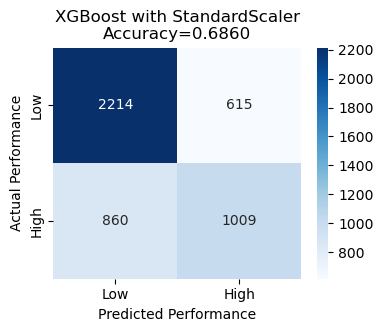

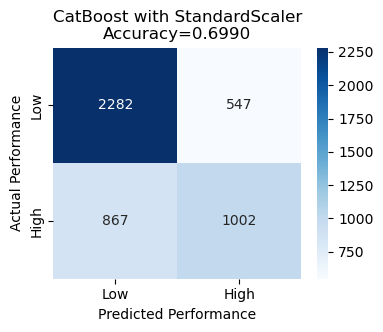

[LightGBM] [Info] Number of positive: 7477, number of negative: 11315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 18792, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.397882 -> initscore=-0.414298
[LightGBM] [Info] Start training from score -0.414298


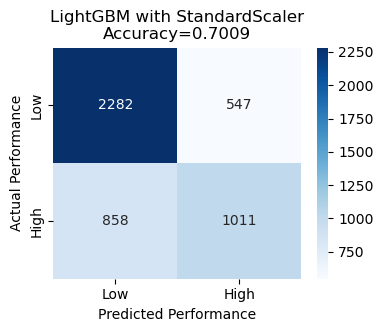

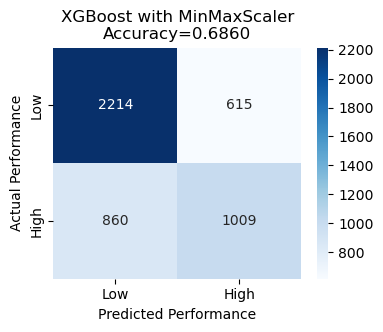

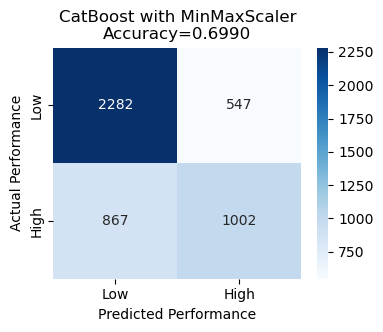

[LightGBM] [Info] Number of positive: 7477, number of negative: 11315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 18792, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.397882 -> initscore=-0.414298
[LightGBM] [Info] Start training from score -0.414298


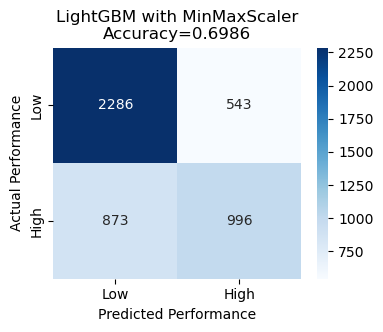

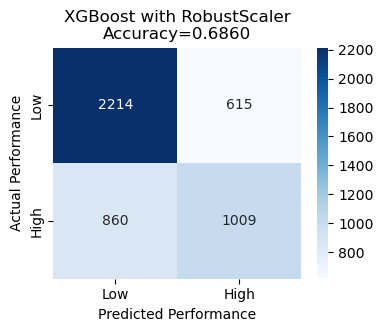

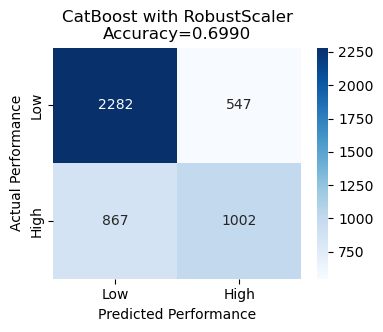

[LightGBM] [Info] Number of positive: 7477, number of negative: 11315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 18792, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.397882 -> initscore=-0.414298
[LightGBM] [Info] Start training from score -0.414298


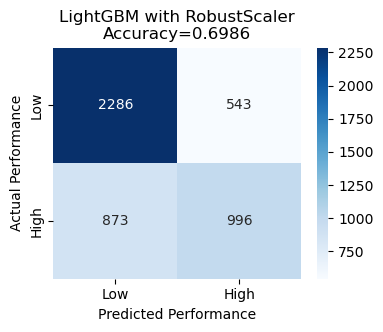


🔹 Model Performance Summary 🔹
           Scaler     Model  Accuracy
2  StandardScaler  LightGBM  0.700937
1  StandardScaler  CatBoost  0.699021
4    MinMaxScaler  CatBoost  0.699021
7    RobustScaler  CatBoost  0.699021
5    MinMaxScaler  LightGBM  0.698595
8    RobustScaler  LightGBM  0.698595
0  StandardScaler   XGBoost  0.686037
3    MinMaxScaler   XGBoost  0.686037
6    RobustScaler   XGBoost  0.686037

✅ Best Scaler: StandardScaler
✅ Best Model: LightGBM
✅ Best Accuracy: 0.7009


In [65]:
# -------------------------------
# Define Scalers
# -------------------------------
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}

# -------------------------------
# Define Models
# -------------------------------
models = {
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

results = []

for scaler_name, scaler in scalers.items():
    # Scale the data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
        
        # Compute accuracy
        acc = accuracy_score(y_test, preds)
        results.append([scaler_name, model_name, acc])
        
        # Confusion matrix with readable labels
        cm = confusion_matrix(y_test, preds)
        plt.figure(figsize=(4,3))
        sns.heatmap(
            cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Low", "High"],
            yticklabels=["Low", "High"]
        )
        plt.title(f"{model_name} with {scaler_name}\nAccuracy={acc:.4f}")
        plt.xlabel("Predicted Performance")
        plt.ylabel("Actual Performance")
        plt.show()

# -------------------------------
# Results Summary
# -------------------------------
results_df = pd.DataFrame(results, columns=["Scaler", "Model", "Accuracy"])
results_df_sorted = results_df.sort_values(by="Accuracy", ascending=False)

print("\n🔹 Model Performance Summary 🔹")
print(results_df_sorted)

# -------------------------------
# Best Model and Scaler
# -------------------------------
best_row = results_df_sorted.iloc[0]
best_scaler = best_row["Scaler"]
best_model = best_row["Model"]
best_accuracy = best_row["Accuracy"]

print(f"\n✅ Best Scaler: {best_scaler}")
print(f"✅ Best Model: {best_model}")
print(f"✅ Best Accuracy: {best_accuracy:.4f}")
